### Sales Analysis

- Refered from Keith Galli
- https://www.youtube.com/watch?v=eMOA1pPVUc4&ab_channel=KeithGalli
- https://github.com/KeithGalli/Pandas-Data-Science-Tasks

##### import necessary lib

In [27]:
import pandas as pd
import os as os
import matplotlib.pyplot as plt

In [28]:
# Merging 12 months of data to single file

sales = pd.read_csv('./SalesAnalysis/Sales_Data/Sales_April_2019.csv')

#os directory

sales_files = [file for file in os.listdir('./SalesAnalysis/Sales_Data')]

sales_data_yr = pd.DataFrame()

for file in sales_files:
    sales = pd.read_csv('./SalesAnalysis/Sales_Data/' + file)
    sales_data_yr = pd.concat([sales_data_yr, sales])
#concat to single csv

sales_data_yr.to_csv('sales_data_yr.csv', index= False)


In [29]:
sales_data_yr = pd.read_csv('sales_data_yr.csv')
sales_data_yr.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Clean up the data (NaN)

In [30]:
# drop rows of NaN
nan_df = sales_data_yr[sales_data_yr.isna().any(axis = 1)]

sales_data_yr = sales_data_yr.dropna(how = 'all')

sales_data_yr

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [31]:
# After removing NaN, message below popped up.
# ValueError: invalid literal for int() with base 10: 'Or'

#[solution]
sales_data_yr = sales_data_yr[sales_data_yr['Order Date'].str[0:2] != 'Or']

# Instead of creating new variable, update the 'sales_data_yr'
sales_data_yr


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Task 2: Add Month Column

In [32]:
# Augment data with additional columns

sales_data_yr['Month'] = sales_data_yr['Order Date'].str[0:2] # Date to String
sales_data_yr['Month'] = sales_data_yr['Month'].astype('int64')
sales_data_yr.head()

C:\Users\user\AppData\Local\Temp\ipykernel_11892\2849903918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_yr['Month'] = sales_data_yr['Order Date'].str[0:2] # Date to String
C:\Users\user\AppData\Local\Temp\ipykernel_11892\2849903918.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_yr['Month'] = sales_data_yr['Month'].astype('int64')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Best month for sales // How much was earned?

#### Task 3: Add a Sales column

In [33]:
# TypeError: an't multiply sequence by non-int of type 'str'

# [Covert columns to the correct type]
sales_data_yr['Quantity Ordered'] = pd.to_numeric(sales_data_yr['Quantity Ordered']) #make int
sales_data_yr['Price Each'] = pd.to_numeric(sales_data_yr['Price Each']) #make float

C:\Users\user\AppData\Local\Temp\ipykernel_11892\1279288457.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_yr['Quantity Ordered'] = pd.to_numeric(sales_data_yr['Quantity Ordered']) #make int
C:\Users\user\AppData\Local\Temp\ipykernel_11892\1279288457.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_yr['Price Each'] = pd.to_numeric(sales_data_yr['Price Each']) #make float


In [34]:
# Creating 'Sales' value ( Quantity Ordered * Price Each)
sales_data_yr['Sales'] = sales_data_yr['Quantity Ordered'] * sales_data_yr['Price Each']

sales_data_yr
# if TypeError: an't multiply sequence by non-int of type 'str', see the above cell.

# Moving 'Sales' column next to 'Price Each'

C:\Users\user\AppData\Local\Temp\ipykernel_11892\1969490360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_yr['Sales'] = sales_data_yr['Quantity Ordered'] * sales_data_yr['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [35]:
# Best month for sales // How much was earned?

# Group By
sales_result = sales_data_yr.groupby('Month').sum()

Text(0, 0.5, 'Sales in USD($)')

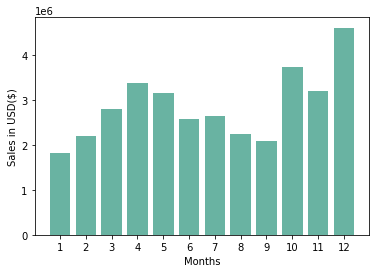

In [36]:
# Check with visualized graphs - matplotlib.pyplot

# [Bar Chart Visualization]

months = range(1,13)

plt.bar(months, sales_result['Sales'],color="#69b3a2")
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD($)')

#### What U.S City had the highest number of sales

##### Add a city column


In [37]:
# From 'Purchase Address', extract the city 
# Use .apply() and test as column name = 'column'
sales_data_yr['Column'] = sales_data_yr['Purchase Address'].apply(lambda x: x.split(',')[1])
sales_data_yr.head()

# x = cell contents// for each of the contents, split by ','

# [def]
def get_city(address):
    return address.split(',')[1]

sales_data_yr['Column'] = sales_data_yr['Purchase Address'].apply(lambda x: x.split(',')[1])

C:\Users\user\AppData\Local\Temp\ipykernel_11892\3355461253.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_yr['Column'] = sales_data_yr['Purchase Address'].apply(lambda x: x.split(',')[1])
C:\Users\user\AppData\Local\Temp\ipykernel_11892\3355461253.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_yr['Column'] = sales_data_yr['Purchase Address'].apply(lambda x: x.split(',')[1])


In [38]:

# [def]
def get_city(address):
    return address.split(',')[1]

# In terms of United States, there are duplicated city names // Add states code TX, NY
# Also wants to remove the zipcodes
def get_statecode(address):
    return address.split(',')[2].split(' ')[1]

sales_data_yr['City'] = sales_data_yr['Purchase Address'].apply(lambda x: f"{get_city(x)}  {get_statecode(x)}")


# 기존 column 항목을 drop
#sales_data_yr = sales_data_yr.drop(columns='Column')

sales_data_yr.head()

C:\Users\user\AppData\Local\Temp\ipykernel_11892\3918724404.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_yr['City'] = sales_data_yr['Purchase Address'].apply(lambda x: f"{get_city(x)}  {get_statecode(x)}")


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Column,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA


##### Create result

In [39]:
sales_result_city = sales_data_yr.groupby('City').sum()
sales_result_city


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.22,70621,1870732.34
San Francisco CA,50239,8211461.74,315520,8262203.91


Text(0, 0.5, 'Sales in USD($)')

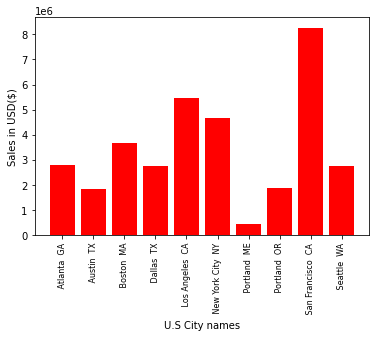

In [40]:
cities = sales_data_yr['City'].unique()

# When you created the chart, you will notice the inconsistency between df and chart
# For instance, higest sales were made in Los Angeles CA, but bar chart showed in Austin TX (Always double-check the inconsistency between df and graph.)
# Therefore, create a cities list with for loop

cities = [city for city, df in sales_data_yr.groupby('City')]

plt.bar(cities, sales_result_city['Sales'],color="r")
plt.xticks(cities,rotation = 'vertical', size = 8 )
plt.xlabel('U.S City names')
plt.ylabel('Sales in USD($)')

# Based on the graph, create some hypothesis (For instance, why sales in SF CA was high?) +> Draw the conclusion 

#### What time should we display ads to maxmize the likelihood of customer's buying product?

In [41]:
sales_data_yr.head()
# Look Order Date => They are str types.
# convert as daytime object

sales_data_yr['Order Date'] = pd.to_datetime(sales_data_yr['Order Date'])

sales_data_yr.head()

C:\Users\user\AppData\Local\Temp\ipykernel_11892\2676955716.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_yr['Order Date'] = pd.to_datetime(sales_data_yr['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Column,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA


In [42]:
sales_data_yr['Hour'] = sales_data_yr['Order Date'].dt.hour
sales_data_yr['Minute'] = sales_data_yr['Order Date'].dt.minute
sales_data_yr['Count'] = 1
sales_data_yr.head()



C:\Users\user\AppData\Local\Temp\ipykernel_11892\3911995815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_yr['Hour'] = sales_data_yr['Order Date'].dt.hour
C:\Users\user\AppData\Local\Temp\ipykernel_11892\3911995815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_yr['Minute'] = sales_data_yr['Order Date'].dt.minute
C:\Users\user\AppData\Local\Temp\ipykernel_11892\3911995815.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Column,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas TX,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston MA,22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles CA,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA,14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA,9,27,1


In [43]:
# Create list of hours keys

hours = [hour for hour, df in sales_data_yr.groupby('Hour')]
sales_y = sales_data_yr.groupby(['Quantity Ordered']).count()

plt.plot(hours , sales_y['Quantity Ordered'] .count())


plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid

# plt.show()


sales_data_yr.groupby(['Hour']).count()




KeyError: 'Quantity Ordered'

In [ ]:
sales_data_yr[sales_data_yr['Quantity Ordered']]

KeyError: "None of [Int64Index([2, 1, 1, 1, 1, 1, 1, 1, 1, 1,\n            ...\n            1, 1, 1, 1, 1, 3, 1, 1, 1, 1],\n           dtype='int64', length=185950)] are in the [columns]"

#### What products are most often sold together?


In [ ]:
# Check the order ID | check the delivery addresses
# 176560 Google Phone + Wired Headphones were sold together.	

sales_data_yr.head()

# Counting duplicates 

# create new df
df_duplicated = sales_data_yr[sales_data_yr['Order ID'].duplicated(keep = False)] # keep = False (Mark all duplicates as 'True')   
df_duplicated.head(20)

# Group them together 
# (176560 Google Phone + Wired Headphones) new column / same line

df_duplicated['Grouped Product'] = df_duplicated.groupby('Order ID')['Product'].transform(lambda x: ','. join(x))

# Notice the DataFrame => 176560 and others data have been added twice.
# Drop the duplicates

df_duplicated = df_duplicated[['Order ID', 'Grouped Product']].drop_duplicates()

df_duplicated.head(20)

C:\Users\user\AppData\Local\Temp\ipykernel_10876\3352774547.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duplicated['Grouped Product'] = df_duplicated.groupby('Order ID')['Product'].transform(lambda x: ','. join(x))


,Order ID,Grouped Product
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [ ]:
# Count the pairs of products  
from itertools import combinations  # watch stackoverflows
from collections import Counter

count = Counter()
for row in df_duplicated['Grouped Product']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2))) # (row_list,3) if you want to look over combination of 3 items.
#print(count)

#Nicer fomrmat
count.most_common(10)

#More nicer?
for key, value in count.most_common(10):
    print(key, value)

# Counter({('iPhone', 'Lightning Charging Cable'): 1005
# => It indicates that combination of iPhone + Lightning Charging Cable were sold most

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### What product sold the most and why?

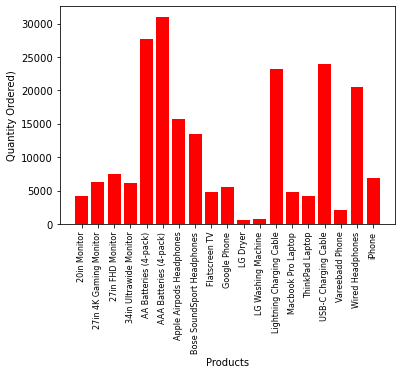

In [ ]:
sales_data_yr.head()

# Sum up the 'Quantity Orderd'and grouping by the product

product_group = sales_data_yr.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered,color="r")
plt.xticks(products,rotation = 'vertical', size = 8 )
plt.xlabel('Products')
plt.ylabel('Quantity Ordered)')

plt.show()

# Conclustion : AAA Batteries (4-pack) were sold most (cheap)
# On the other hand, LG dryer / LG Washing Machine were sold most less (Expensive)
# => Because most cheap, expensice => prove hypothesis

In [ ]:
# proving hypothesis above (overlaying with actual price graph) (Correlation)
prices = sales_data_yr.groupby('Product').mean()['Price Each'] # 'Price Each' mean
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_10876\3454410053.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation = 'vertical', size = 8 )


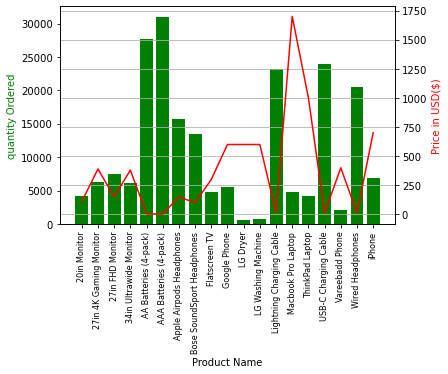

In [ ]:
# Overlaying graphs

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color="g")
ax2. plot(products, prices, 'r-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('quantity Ordered', color = 'g')
ax2.set_ylabel('Price in USD($)', color = 'r')

ax1.set_xticklabels(products,rotation = 'vertical', size = 8 )

plt.grid()

plt.show()
